# Object Detection By OpenCV


### Let's explore Template matching with OpenCV

In [1]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# grab the full image that we are searching for the template
full=cv2.imread('sammy.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB) # correct the color

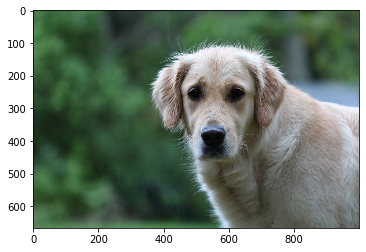

In [4]:
plt.imshow(full) 

In [5]:
# upload the template image
face=cv2.imread('sammyface.jpg')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

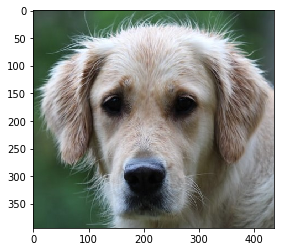

In [6]:
plt.imshow(face) # this image is the subset for the larger image we are searching

In [7]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we will use the eval() function to convert into function
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

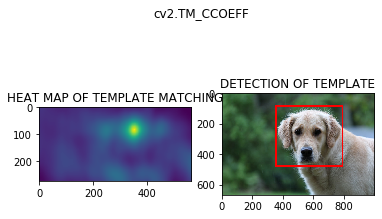

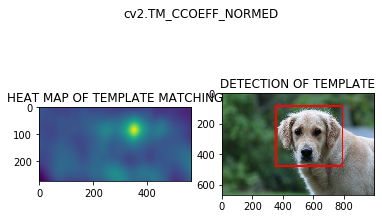

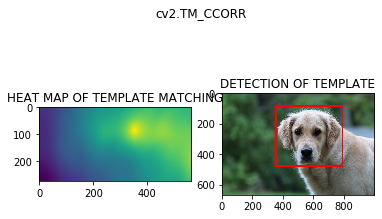

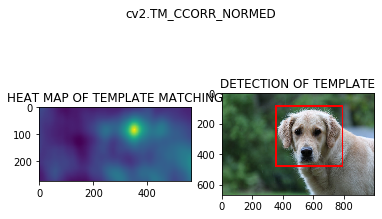

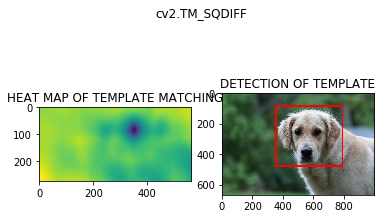

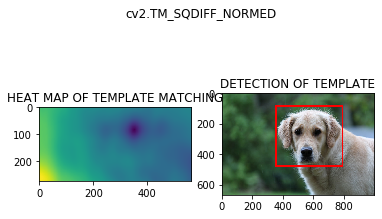

In [8]:
for m in methods:
     # create a copy
        full_copy=full.copy()
        
        # Get the actual function instead of the string
        method=eval(m)
        
        # Template Matching
        res=cv2.matchTemplate(full_copy,face,method) # heatmaps are created
        
        # We are going to find the min value,max value,min location and max location of these heatmaps and then we'll use those
        # to actually draw out a red rectangle for where it thinks found the match of the template
        min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
        
        # So what it does is it takes in that heatmap and it finds that both minimum and maximum locations and it returns it 
        # back as this large tuple that we can then unpack to find the min value,max value,min location and max location
        
        # setting up everything we need to draw a rectangle 
        if method in[cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
            top_left=min_loc
        else:
            top_left=max_loc
            
        height,width,channel=face.shape
        
        bottom_right=(top_left[0]+width,top_left[1]+height)
        
        cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
        
        # PLOT AND SHOW THE IMAGES
        
        plt.subplot(121)
        plt.imshow(res)
        plt.title('HEAT MAP OF TEMPLATE MATCHING')
        
        plt.subplot(122)
        plt.imshow(full_copy)
        plt.title('DETECTION OF TEMPLATE')
        plt.suptitle(m) # title with the method used
        
        plt.show()
        
        print('\n')
        print('\n')

### Practical implementation of Corner Detection

In [9]:
flat_chess=cv2.imread('chessboard.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

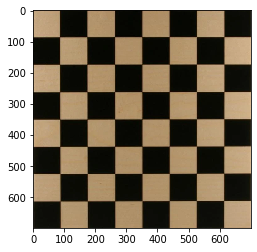

In [10]:
plt.imshow(flat_chess)

In [11]:
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

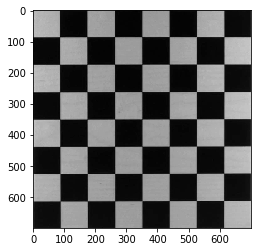

In [12]:
plt.imshow(gray_flat_chess,cmap='gray')

In [13]:
real_chess=cv2.imread('real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

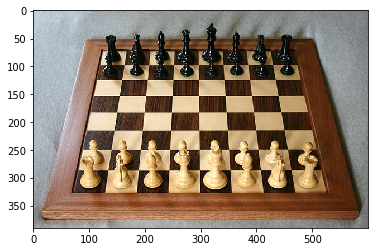

In [14]:
plt.imshow(real_chess)

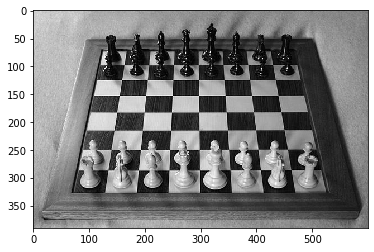

In [15]:
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

#### Applying Harris Corner Detection

In [16]:
gray=np.float32(gray_flat_chess)

OpenCV has the function cv2.cornerHarris() for this purpose. Its arguments are :

* img - Input image, it should be grayscale and float32 type.
* blockSize - It is the size of neighbourhood considered for corner detection
* ksize - Aperture parameter of Sobel derivative used.
* k - Harris detector free parameter in the equation.

In [17]:
dst=cv2.cornerHarris(src=gray,blockSize=4,ksize=3,k=0.04) # Harris Corner Detection Algorithm

In [18]:
# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst=cv2.dilate(dst,None)

In [19]:
# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]

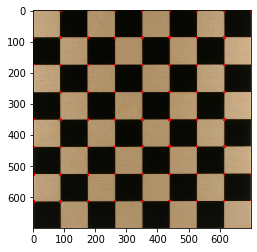

In [20]:
plt.imshow(flat_chess)

In [21]:
gray=np.float32(gray_real_chess)

In [22]:
dst=cv2.cornerHarris(src=gray,blockSize=4,ksize=3,k=0.04)

In [23]:
dst=cv2.dilate(dst,None)

In [24]:
real_chess[dst>0.01*dst.max()]=[255,0,0]

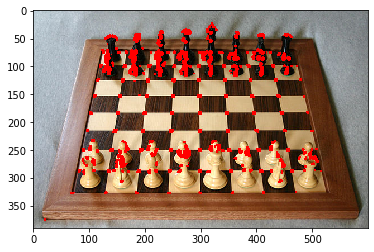

In [25]:
plt.imshow(real_chess)

#### Applying Shi-Tomasi Detection

In [26]:
flat_chess=cv2.imread('chessboard.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

real_chess=cv2.imread('real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

Using goodFeaturesToTrack() function –

**Syntax** : cv2.goodFeaturesToTrack(gray_img, maxc, Q, minD)

**Parameters** :
* gray_img – Grayscale image with integral values
* maxc – Maximum number of corners we want(give negative value to get all the corners)
* Q – Quality level parameter(preferred value=0.01)
* maxD – Maximum distance(preferred value=10)

In [27]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess,64,0.01,10)

In [28]:
corners=np.int0(corners)

In [29]:
for i in corners:
    x,y=i.ravel() # flattening the array
    cv2.circle(flat_chess,(x,y),3,(255,0,0),4)

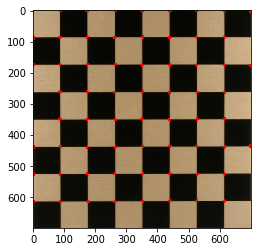

In [30]:
plt.imshow(flat_chess)

In [31]:
corners=cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

In [32]:
corners=np.int0(corners)

In [33]:
for i in corners:
    x,y=i.ravel() 
    cv2.circle(real_chess,(x,y),3,(255,0,0),8)

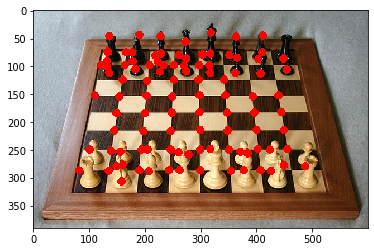

In [34]:
plt.imshow(real_chess)

### Edge Detection

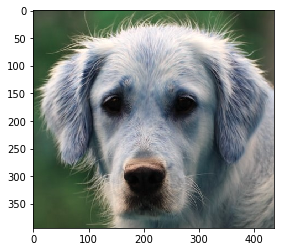

In [35]:
img=cv2.imread('sammyface.jpg')
plt.imshow(img)

In [36]:
edges=cv2.Canny(image=img,threshold1=127,threshold2=127)

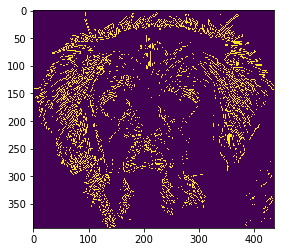

In [37]:
plt.imshow(edges)

In [38]:
# reduce the noise
blurred_img=cv2.blur(img,ksize=(5,5))

In [39]:
med_val=np.median(img)
med_val

111.0

In [40]:
# using a formula to get better threshold points

# Lower threshold to either 0 or 70% of the median value whichever is greater
lower=int(max(0,0.7*med_val))

# upper threshold to either 130% of the median value or the max 255 whichever is smaller
upper=int(min(255,1.3*med_val))

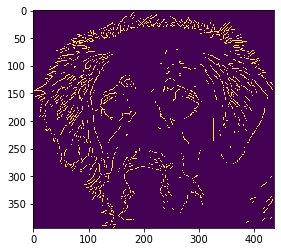

In [41]:
edges=cv2.Canny(image=blurred_img,threshold1=lower,threshold2=upper-60)
plt.imshow(edges)

### Grid Detection 

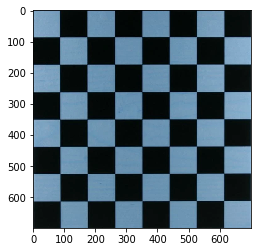

In [42]:
flat_chess=cv2.imread('chessboard.png')
plt.imshow(flat_chess)

In [43]:
found,corners=cv2.findChessboardCorners(flat_chess,(7,7))

In [44]:
found # found chessboard like pattern

True

In [45]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)

array([[[109, 134, 166],
        [105, 131, 163],
        [100, 126, 158],
        ...,
        [ 83,  94,  95],
        [ 88,  99,  99],
        [ 94, 105, 105]],

       [[121, 147, 179],
        [118, 143, 176],
        [113, 139, 171],
        ...,
        [ 36,  48,  48],
        [ 43,  55,  55],
        [ 50,  62,  62]],

       [[137, 165, 197],
        [133, 161, 193],
        [129, 157, 189],
        ...,
        [  7,  19,  19],
        [ 17,  28,  28],
        [ 26,  37,  38]],

       ...,

       [[163, 178, 180],
        [131, 147, 149],
        [ 53,  66,  68],
        ...,
        [132, 164, 197],
        [139, 171, 204],
        [143, 175, 209]],

       [[165, 180, 183],
        [134, 149, 151],
        [ 55,  68,  71],
        ...,
        [125, 157, 190],
        [132, 164, 197],
        [136, 168, 202]],

       [[168, 183, 185],
        [136, 151, 153],
        [ 58,  71,  73],
        ...,
        [118, 150, 183],
        [125, 157, 190],
        [129, 161, 195]]

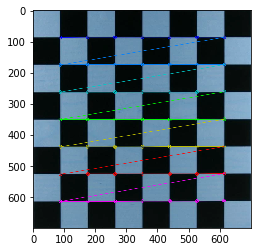

In [46]:
plt.imshow(flat_chess)

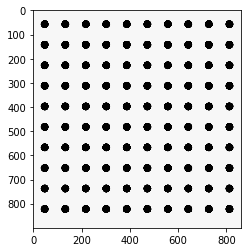

In [47]:
dots=cv2.imread('dot_grid.png')
plt.imshow(dots)

In [48]:
found,corners=cv2.findCirclesGrid(dots,(10,10),cv2.CALIB_CB_SYMMETRIC_GRID)

In [49]:
cv2.drawChessboardCorners(dots,(10,10),corners,found)

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

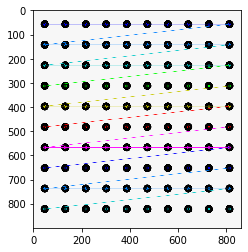

In [50]:
plt.imshow(dots)

### Contour Detection

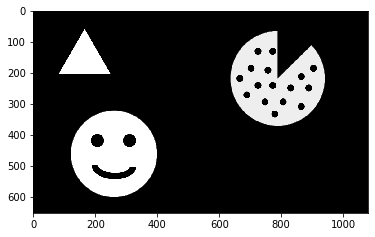

In [51]:
img=cv2.imread('internal_external.png',0)
plt.imshow(img,cmap='gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [52]:
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [53]:
type(contours)

list

In [54]:
len(contours)

22

In [55]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [56]:
external_contours=np.zeros(img.shape)

In [57]:
external_contours.shape

(652, 1080)

In [58]:
for i in range(len(contours)):
    #EXTERNAL
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

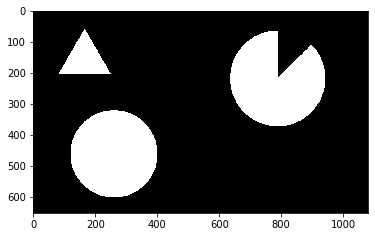

In [59]:
plt.imshow(external_contours,cmap='gray')

In [60]:
internal_contours=np.zeros(img.shape)
for i in range(len(contours)):
    #INTERNAL
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)

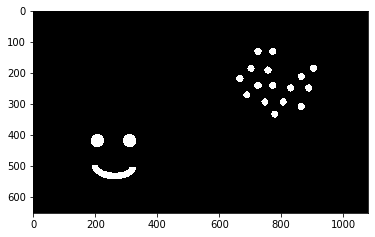

In [61]:
plt.imshow(internal_contours,cmap='gray')

### Feature Matching

In [62]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [63]:
reeses=cv2.imread('reeses_puff.png',0)

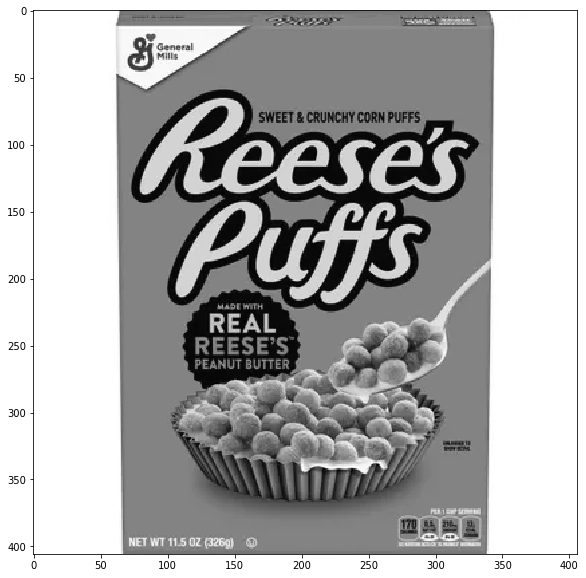

In [64]:
display(reeses) # target image

In [65]:
cereals=cv2.imread('cereals.png',0)

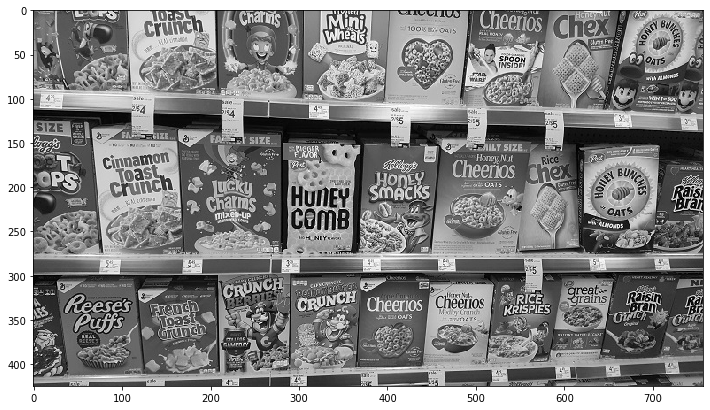

In [66]:
display(cereals) # secondary larger image

In [67]:
# Brute Force with ORB Detectors
orb=cv2.ORB_create() # detector object

In [68]:
# find the key points and descriptors off of this object
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [69]:
# Create the matching objects
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [70]:
# Check where the matches occur
matches=bf.match(des1,des2)

In [71]:
# Sort the matches according to their distance
# the less distance it has that means it's better of a match
matches=sorted(matches,key=lambda x:x.distance)

In [72]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

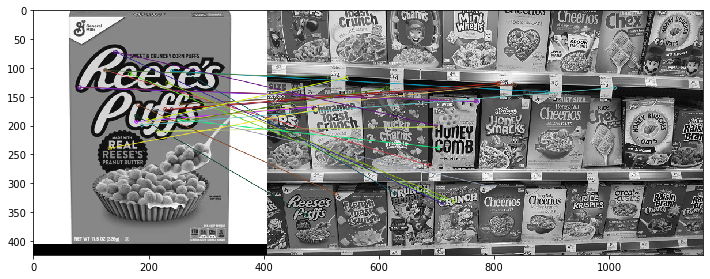

In [73]:
display(reeses_matches)

In [74]:
# Brute Force with ORB detector does not match properly so we will apply other methods

In [75]:
# Brute Force with SIFT Detecters

In [76]:
sift=cv2.xfeatures2d.SIFT_create()

In [77]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [78]:
bf=cv2.BFMatcher()

In [79]:
matches=bf.knnMatch(des1,des2,k=2)

In [80]:
# Ratio Test
good=[]

# Less distance == Better match
# Ratio match1 < 75% Ratio match2

for match1,match2 in matches:
    #If match1 distance is less than 75% of match2 distance
    # then description was a good match,Let's keep it!
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [81]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

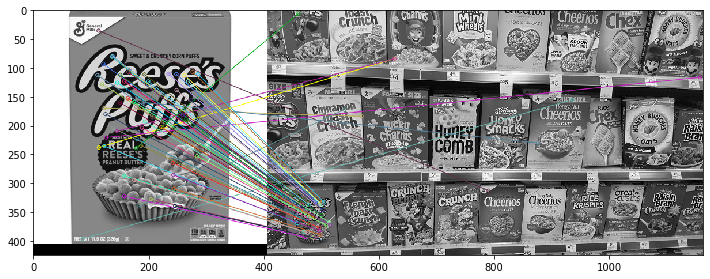

In [82]:
display(sift_matches)

In [83]:
# Flann based Martcher

In [84]:
sift=cv2.xfeatures2d.SIFT_create()
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [85]:
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,tree=5)
search_params=dict(check=50)
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [86]:
matches=flann.knnMatch(des1,des2,k=2)

In [87]:
good=[]
for match1,match2 in matches:
        if match1.distance < 0.75*match2.distance:
            good.append([match1])

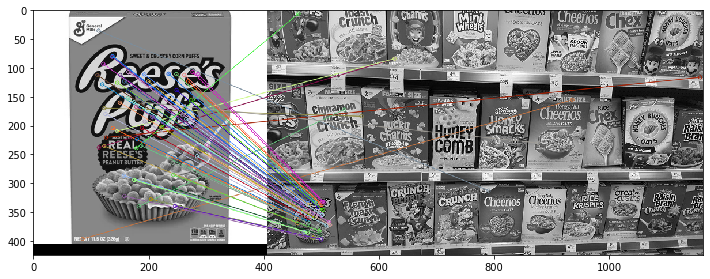

In [88]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)

### Watershed Algorithm

In [89]:
img = cv2.imread('pennies.jpg')

In [90]:
img = cv2.medianBlur(img,35)

In [91]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [92]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

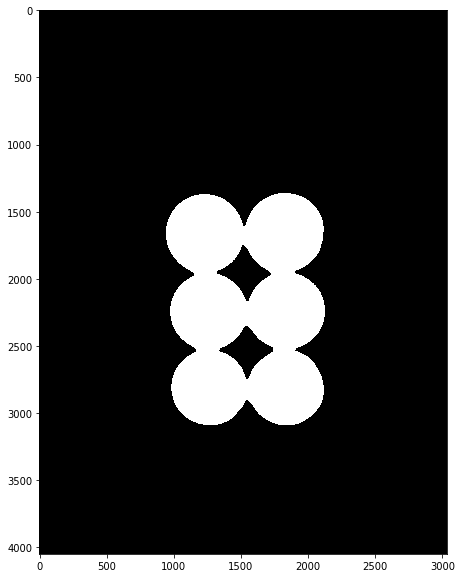

In [93]:
display(thresh,cmap='gray')

In [94]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

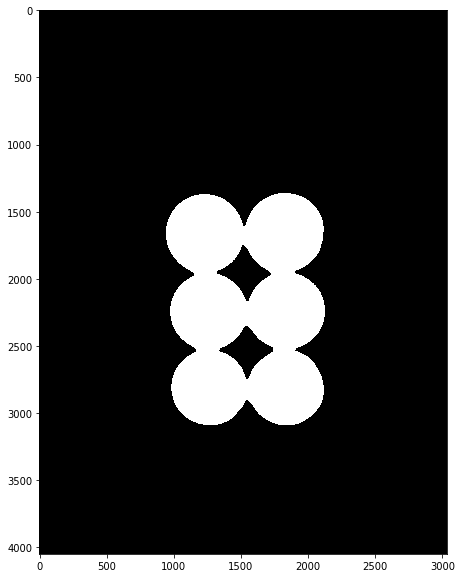

In [95]:
display(opening,cmap='gray')

In [96]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

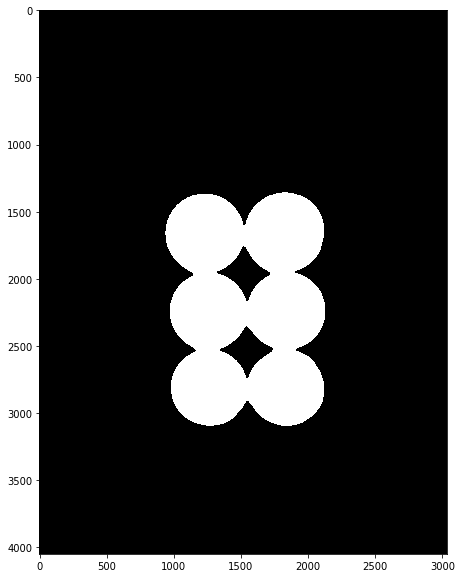

In [97]:
display(sure_bg,cmap='gray')

In [98]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

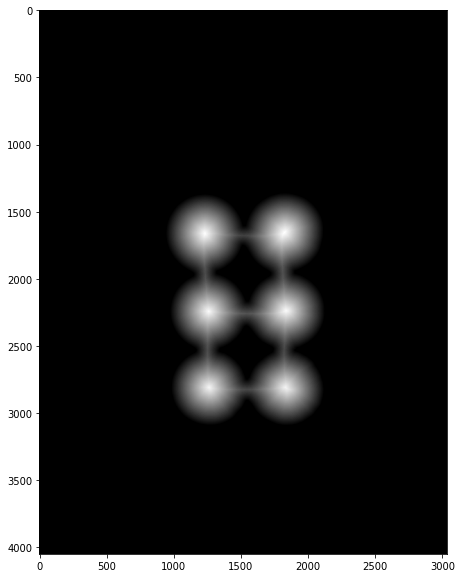

In [99]:
display(dist_transform,cmap='gray')

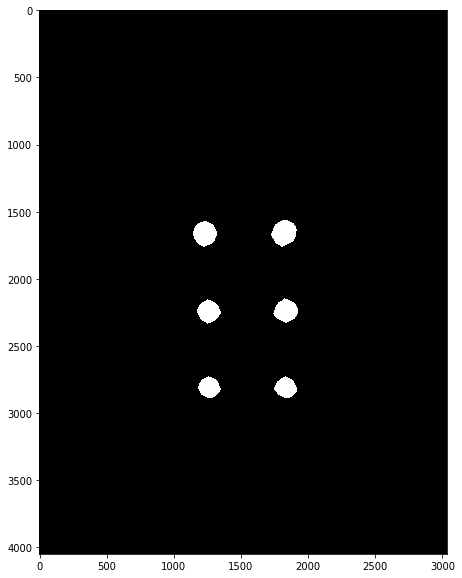

In [100]:
display(sure_fg,cmap='gray')

In [101]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

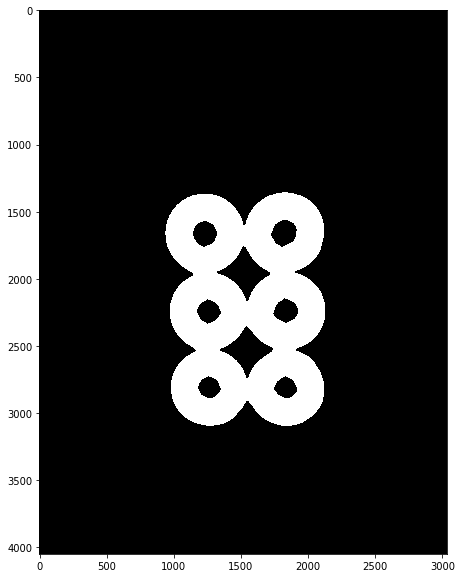

In [102]:
display(unknown,cmap='gray')

In [103]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

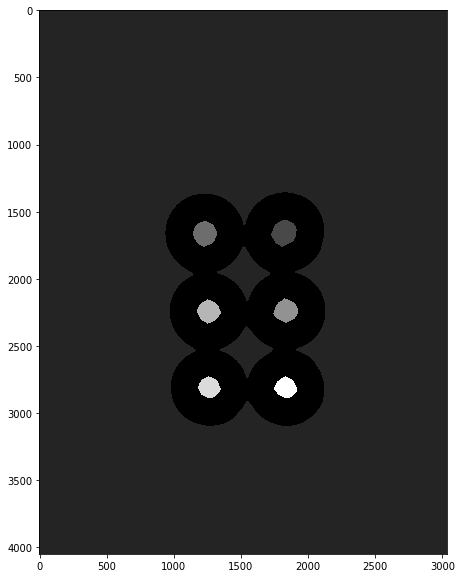

In [104]:
display(markers,cmap='gray')

In [105]:
markers = cv2.watershed(img,markers)

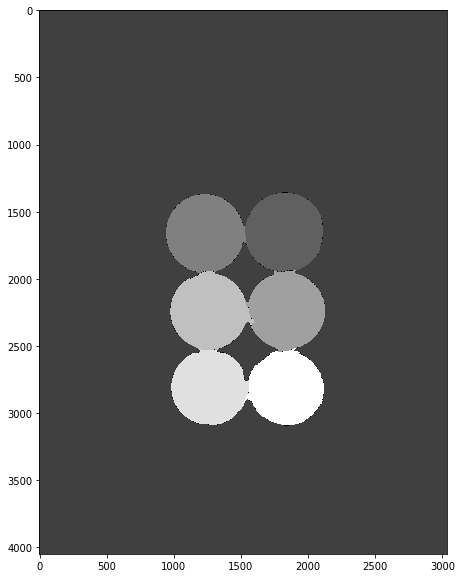

In [106]:
display(markers)

In [107]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

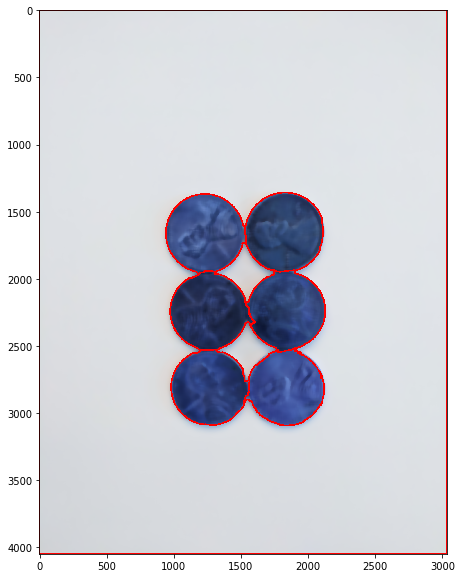

In [108]:
display(img)

### Face Detection

In [109]:
nadia=cv2.imread('nadia.jpg',0)
denis=cv2.imread('denis.jpg',0)
solvay=cv2.imread('solvay.jpg',0)

In [110]:
face_cascade=cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [111]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

In [112]:
result = detect_face(denis)

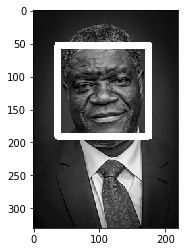

In [113]:
plt.imshow(result,cmap='gray')

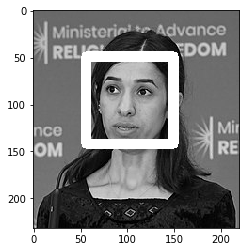

In [114]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

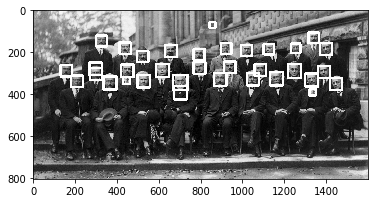

In [115]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [116]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

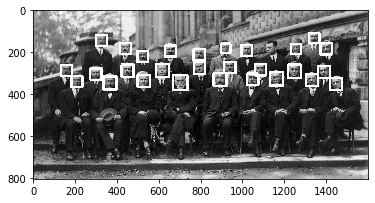

In [117]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [118]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [119]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

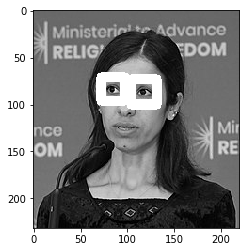

In [120]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

In [121]:
eyes = eye_cascade.detectMultiScale(denis) 

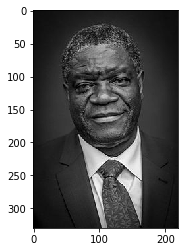

In [122]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [ ]:
# Author: Anjali Saini
# Email: anjalisaini302@gmail.com